In [1]:
import random
import math

import matplotlib
from pylab import plot, legend, subplot, grid, xlabel, ylabel, show, title

from pyneurgen.neuralnet import NeuralNet
from pyneurgen.nodes import BiasNode, Connection

#   all samples are drawn from this population
pop_len = 200
factor = 1.0 / float(pop_len)
population = [[i, math.sin(float(i) * factor * 10.0) + \
                random.gauss(float(i) * factor, .2)]
                    for i in range(pop_len)]

all_inputs = []
all_targets = []

def population_gen(population):
    """
    This function shuffles the values of the population and yields the
    items in a random fashion.
    """

    pop_sort = [item for item in population]
    random.shuffle(pop_sort)

    for item in pop_sort:
        yield item

#   Build the inputs
for position, target in population_gen(population):
    pos = float(position)
    all_inputs.append([random.random(), pos * factor])
    all_targets.append([target])

print("input statistics")
print("  random:", min([item[0] for item in all_inputs]), \
                            max([item[0] for item in all_inputs]))
print("  useful:", min([item[1] for item in all_inputs]), \
                            max([item[1] for item in all_inputs]))
print("target statistics:", min(all_targets), max(all_targets))

input statistics
  random: 0.0020775766001752682 0.995706260555164
  useful: 0.0 0.995
target statistics: [-0.8354183055302922] [2.254594783395517]


In [2]:
net = NeuralNet()
net.init_layers(2, [10], 1)

net.randomize_network()
net.set_halt_on_extremes(True)

#   Set to constrain beginning weights to -.5 to .5
#       Just to show we can
net.set_random_constraint(.5)
net.set_learnrate(.1)

net.set_all_inputs(all_inputs)
net.set_all_targets(all_targets)

length = len(all_inputs)
learn_end_point = int(length * .8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

#   Set the hidden layer activation type tanh
net.layers[1].set_activation_type('tanh')

net.learn(epochs=125, show_epoch_results=True,
    random_testing=False)

mse = net.test()
print("test mse = ", mse)

test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]

epoch: 0 MSE: 0.35719970758335734
epoch: 1 MSE: 0.28827333098770463
epoch: 2 MSE: 0.27598036036482465
epoch: 3 MSE: 0.2689515811601281
epoch: 4 MSE: 0.2639303937790431
epoch: 5 MSE: 0.2599072337442998
epoch: 6 MSE: 0.25675309631104937
epoch: 7 MSE: 0.2544390319386507
epoch: 8 MSE: 0.2528446513950406
epoch: 9 MSE: 0.25183322875071135
epoch: 10 MSE: 0.25119547804045883
epoch: 11 MSE: 0.2507421443203596
epoch: 12 MSE: 0.2503700094716184
epoch: 13 MSE: 0.25003508144990116
epoch: 14 MSE: 0.24971889806841366
epoch: 15 MSE: 0.24941191836928303
epoch: 16 MSE: 0.24910721793060192
epoch: 17 MSE: 0.24879826835555
epoch: 18 MSE: 0.24847808608516905
epoch: 19 MSE: 0.24813878231688213
epoch: 20 MSE: 0.24777120983134523
epoch: 21 MSE: 0.24736464404674002
epoch: 22 MSE: 0.24690654447974594
epoch: 23 MSE: 0.24638252728354035
epoch: 24 MSE: 0.2457767723099335
epoch: 25 MSE: 0.24507317429347047
epoch: 26 MSE: 0.24425755437687177
epoch: 27 MSE: 0.24332103458773843
epoch: 28 MSE: 0.24226409588564204
epoch:

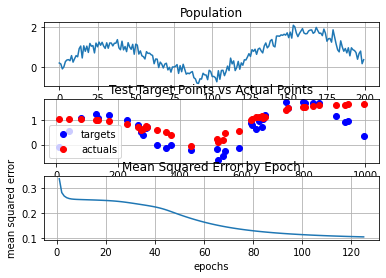

In [2]:
#   This is quick and dirty, but it will show the results
subplot(3, 1, 1)
plot([i[1] for i in population])
title("Population")
grid(True)

subplot(3, 1, 2)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='lower left', numpoints=1)
title("Test Target Points vs Actual Points")

subplot(3, 1, 3)
plot(range(1, len(net.accum_mse) + 1, 1), net.accum_mse)
xlabel('epochs')
ylabel('mean squared error')
grid(True)
title("Mean Squared Error by Epoch")

show()